## A. DATA IMPORTING

In [1]:
import pandas as pd
df = pd.read_csv('phones_data.csv', header = 0)

In [2]:
df.head()

,Unnamed: 0,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
0,0,ALCATEL,1 1/8GB Bluish Black (5033D-2JALUAA),Android,422,1690.0,1529.0,1819.0,36,5.00,8.0,2000.0,10-2020
1,1,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,323,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
2,2,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,299,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
3,3,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,287,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
4,4,Nokia,1.3 1/16GB Charcoal,Android,1047,1999.0,NaN,NaN,10,5.71,16.0,3000.0,4-2020


## B. DATA PREPROCESSING

In [3]:
# pengecekan tipe data dari setiap atribut
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224 entries, 0 to 1223
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1224 non-null   int64  
 1   brand_name      1224 non-null   object 
 2   model_name      1224 non-null   object 
 3   os              1027 non-null   object 
 4   popularity      1224 non-null   int64  
 5   best_price      1224 non-null   float64
 6   lowest_price    964 non-null    float64
 7   highest_price   964 non-null    float64
 8   sellers_amount  1224 non-null   int64  
 9   screen_size     1222 non-null   float64
 10  memory_size     1112 non-null   float64
 11  battery_size    1214 non-null   float64
 12  release_date    1224 non-null   object 
dtypes: float64(6), int64(3), object(4)
memory usage: 124.4+ KB


#### 1. Menghapus kolom yang tidak dibutuhkan

In [4]:
df = df.drop(columns='Unnamed: 0')

#### 2. Mengonversi tipe data *release_date* menjadi datetime

In [5]:
df.isna().sum()

brand_name          0
model_name          0
os                197
popularity          0
best_price          0
lowest_price      260
highest_price     260
sellers_amount      0
screen_size         2
memory_size       112
battery_size       10
release_date        0
dtype: int64

##### Terdapat missing values pada OS, lowest_price, highest_price, screen_size, memory_size, dan battery_size. Maka akan dilakukan pengisian satu per satu.

#### 4. Pengisian *missing values*

##### a. screen_size

In [6]:
# menggunakan nilai rata-rata yang muncul dari atribut screen_size
df['screen_size'].fillna(df['screen_size'].mean(), inplace=True)

##### b. memory_size

In [7]:
# menggunakan nilai rata-rata yang muncul dari atribut memory_size
df['memory_size'].fillna(df['memory_size'].mean(), inplace=True)

##### c. lowest_price dan highest_price

In [8]:
# menggunakan nilai best_price dari masing-masing smartphone
# karena harga terbaik sudah menjadi harga standar dan juga dipengaruhi oleh
# atribut lainnya sehingga tidak bisa menggunakan nilai rata-rata dari 
# lowest_price dan highest_price
temp = df[df.lowest_price.isna()]
temp.lowest_price = temp.best_price
temp.highest_price = temp.best_price
df[df.lowest_price.isna()] = temp

C:\Users\adama\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


##### d. battery_size

In [9]:
# menggunakan nilai rata-rata yang muncul dari atribut battery_size
df['battery_size'].fillna(df['battery_size'].mean(), inplace=True)

##### e. OS

In [10]:
# diisi menjadi "Other" karena jika OS yang diprediksi salah
# maka akan berpengaruh kepada atribut lainnya
temp = df[df.os.isna()]
temp.os = temp.os.fillna('Other')
df[df.os.isna()] = temp

##### Setelah dilakukan pengisian maka diperiksa kembali apakah masih ada *missing values*

In [11]:
df.isna().sum()

brand_name        0
model_name        0
os                0
popularity        0
best_price        0
lowest_price      0
highest_price     0
sellers_amount    0
screen_size       0
memory_size       0
battery_size      0
release_date      0
dtype: int64

#### Data berhasil diisi semua

##### a. Pengecekan tipe data

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224 entries, 0 to 1223
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brand_name      1224 non-null   object 
 1   model_name      1224 non-null   object 
 2   os              1224 non-null   object 
 3   popularity      1224 non-null   int64  
 4   best_price      1224 non-null   float64
 5   lowest_price    1224 non-null   float64
 6   highest_price   1224 non-null   float64
 7   sellers_amount  1224 non-null   int64  
 8   screen_size     1224 non-null   float64
 9   memory_size     1224 non-null   float64
 10  battery_size    1224 non-null   float64
 11  release_date    1224 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 114.9+ KB


In [13]:
df['lowest_price'] = df['lowest_price'].astype('int64')
df['highest_price'] = df['highest_price'].astype('int64')
df['best_price'] = df['best_price'].astype('int64')
df['memory_size'] = df['memory_size'].astype('int64')
df['battery_size'] = df['battery_size'].astype('int64')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224 entries, 0 to 1223
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brand_name      1224 non-null   object 
 1   model_name      1224 non-null   object 
 2   os              1224 non-null   object 
 3   popularity      1224 non-null   int64  
 4   best_price      1224 non-null   int64  
 5   lowest_price    1224 non-null   int64  
 6   highest_price   1224 non-null   int64  
 7   sellers_amount  1224 non-null   int64  
 8   screen_size     1224 non-null   float64
 9   memory_size     1224 non-null   int64  
 10  battery_size    1224 non-null   int64  
 11  release_date    1224 non-null   object 
dtypes: float64(1), int64(7), object(4)
memory usage: 114.9+ KB


In [15]:
df

,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
0,ALCATEL,1 1/8GB Bluish Black (5033D-2JALUAA),Android,422,1690,1529,1819,36,5.00,8,2000,10-2020
1,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,323,1803,1659,2489,36,5.00,16,2000,9-2020
2,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,299,1803,1659,2489,36,5.00,16,2000,9-2020
3,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,287,1803,1659,2489,36,5.00,16,2000,9-2020
4,Nokia,1.3 1/16GB Charcoal,Android,1047,1999,1999,1999,10,5.71,16,3000,4-2020
...,...,...,...,...,...,...,...,...,...,...,...,...
1219,Apple,iPhone XS Max 64GB Gold (MT522),iOS,1101,22685,16018,27900,61,6.50,64,3174,9-2018
1220,Apple,iPhone XS Max Dual Sim 64GB Gold (MT732),iOS,530,24600,21939,33720,28,6.50,64,3174,9-2018
1221,HUAWEI,nova 5T 6/128GB Black (51094MEU),Android,1174,8804,7999,9999,18,6.26,128,3750,11-2019
1222,ZTE,nubia Red Magic 5G 8/128GB Black,Android,752,18755,18500,19010,2,6.65,128,4500,10-2020


##### c. Mengonversi nilai kolom lowest_price, highest_price, dan best_price agar sesuai dengan kurs UAH to IDR pada 5 April 2021

In [16]:
# 1 UAH = Rp520

s = pd.Series(df['best_price'])
s = s*520
df['best_price'] = s

t = pd.Series(df['lowest_price'])
t = s*520
df['lowest_price'] = t

u = pd.Series(df['highest_price'])
u = s*520
df['highest_price'] = u

In [17]:
df

,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
0,ALCATEL,1 1/8GB Bluish Black (5033D-2JALUAA),Android,422,878800,456976000,456976000,36,5.00,8,2000,10-2020
1,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,323,937560,487531200,487531200,36,5.00,16,2000,9-2020
2,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,299,937560,487531200,487531200,36,5.00,16,2000,9-2020
3,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,287,937560,487531200,487531200,36,5.00,16,2000,9-2020
4,Nokia,1.3 1/16GB Charcoal,Android,1047,1039480,540529600,540529600,10,5.71,16,3000,4-2020
...,...,...,...,...,...,...,...,...,...,...,...,...
1219,Apple,iPhone XS Max 64GB Gold (MT522),iOS,1101,11796200,6134024000,6134024000,61,6.50,64,3174,9-2018
1220,Apple,iPhone XS Max Dual Sim 64GB Gold (MT732),iOS,530,12792000,6651840000,6651840000,28,6.50,64,3174,9-2018
1221,HUAWEI,nova 5T 6/128GB Black (51094MEU),Android,1174,4578080,2380601600,2380601600,18,6.26,128,3750,11-2019
1222,ZTE,nubia Red Magic 5G 8/128GB Black,Android,752,9752600,5071352000,5071352000,2,6.65,128,4500,10-2020


In [18]:
# INTERMEZZO
# mencari hubungan/korelasi antara harga dan atribut lainnya
df.corr()

,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size
popularity,1.000000,0.344586,0.344586,0.344586,0.494578,0.328907,0.191378,0.214991
best_price,0.344586,1.000000,1.000000,1.000000,0.298962,0.453225,0.686725,0.176473
lowest_price,0.344586,1.000000,1.000000,1.000000,0.298962,0.453225,0.686725,0.176473
highest_price,0.344586,1.000000,1.000000,1.000000,0.298962,0.453225,0.686725,0.176473
sellers_amount,0.494578,0.298962,0.298962,0.298962,1.000000,-0.026003,0.148241,-0.032052
screen_size,0.328907,0.453225,0.453225,0.453225,-0.026003,1.000000,0.292086,0.614733
memory_size,0.191378,0.686725,0.686725,0.686725,0.148241,0.292086,1.000000,0.138734
battery_size,0.214991,0.176473,0.176473,0.176473,-0.032052,0.614733,0.138734,1.000000


##### best_price erat kaitannya dengan memory_size, tapi kenapa nilainya malah sangat kuat kaitannya dengan lowest_price dan highest_price ya? padahal kan harusnya engga

## C. Data Visualization

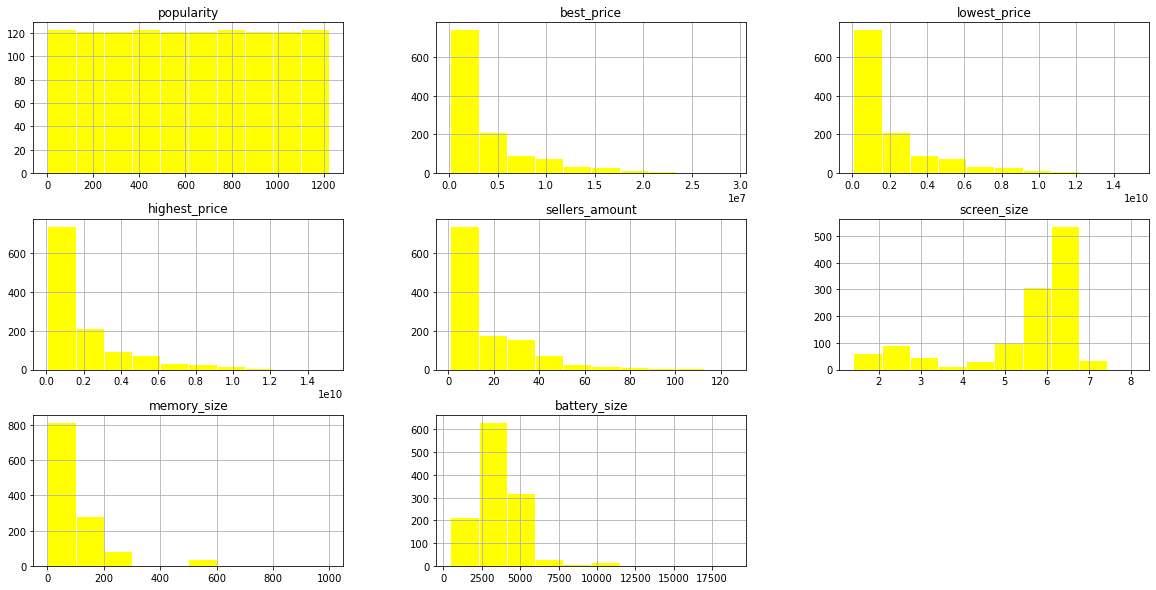

,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size
count,1224.000000,1.224000e+03,1.224000e+03,1.224000e+03,1224.000000,1224.000000,1224.000000,1224.000000
mean,612.500000,4.129427e+06,2.147302e+09,2.147302e+09,16.743464,5.394378,95.633987,3608.200163
std,353.482673,4.623755e+06,2.404353e+09,2.404353e+09,20.597006,1.475783,106.676715,1661.434379
min,1.000000,1.112800e+05,5.786560e+07,5.786560e+07,1.000000,1.400000,0.000000,460.000000
25%,306.750000,1.351870e+06,7.029724e+08,7.029724e+08,2.000000,5.187500,32.000000,2900.000000
50%,612.500000,2.458560e+06,1.278451e+09,1.278451e+09,8.000000,6.000000,64.000000,3608.000000
75%,918.250000,4.847960e+06,2.520939e+09,2.520939e+09,26.000000,6.400000,128.000000,4385.000000
max,1224.000000,2.916264e+07,1.516457e+10,1.516457e+10,125.000000,8.100000,1000.000000,18800.000000


In [19]:
import matplotlib.pyplot as plt
numbers = list(df.select_dtypes(['float64', 'int64']).keys())
df[numbers].hist(figsize=(20,10), color='yellow', edgecolor='white')
plt.show()
display(df[numbers].describe())

#### 1. Numerical 

In [20]:
# Ekstraksi kolom yang bukan objek maupun datetime
numericals = df.dtypes[(df.dtypes!='O') & (df.dtypes!='<MB[ns]')].index.tolist()

# Mengekstrak variable berbentuk categorical (dalam dataset ini yaitu Objek)
categoricals = df.dtypes[df.dtypes == 'O'].index.tolist()

# Konstanta untuk Exploratory Data Analysis
width = 20
height = 8

In [21]:
import seaborn as sns
def plot_categorical(frame, column):
    sns.countplot(frame[column]) #ini untuk menghitung banyaknya plot

In [22]:
def plot_numerical(frame, column, categorical=None, ax=None, n_row=None, n_col=None):
    if categorical is None:
        sns.histplot(data=frame, x=column, ax=ax[n_row][n_col]) #simple
    else :
        sns.histplot(data=frame, x=column, hue=categorical, ax=ax[n_row][n_col], legend=True) # ada Category

C:\Users\adama\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\adama\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\adama\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\adama\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\adama\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\adama\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

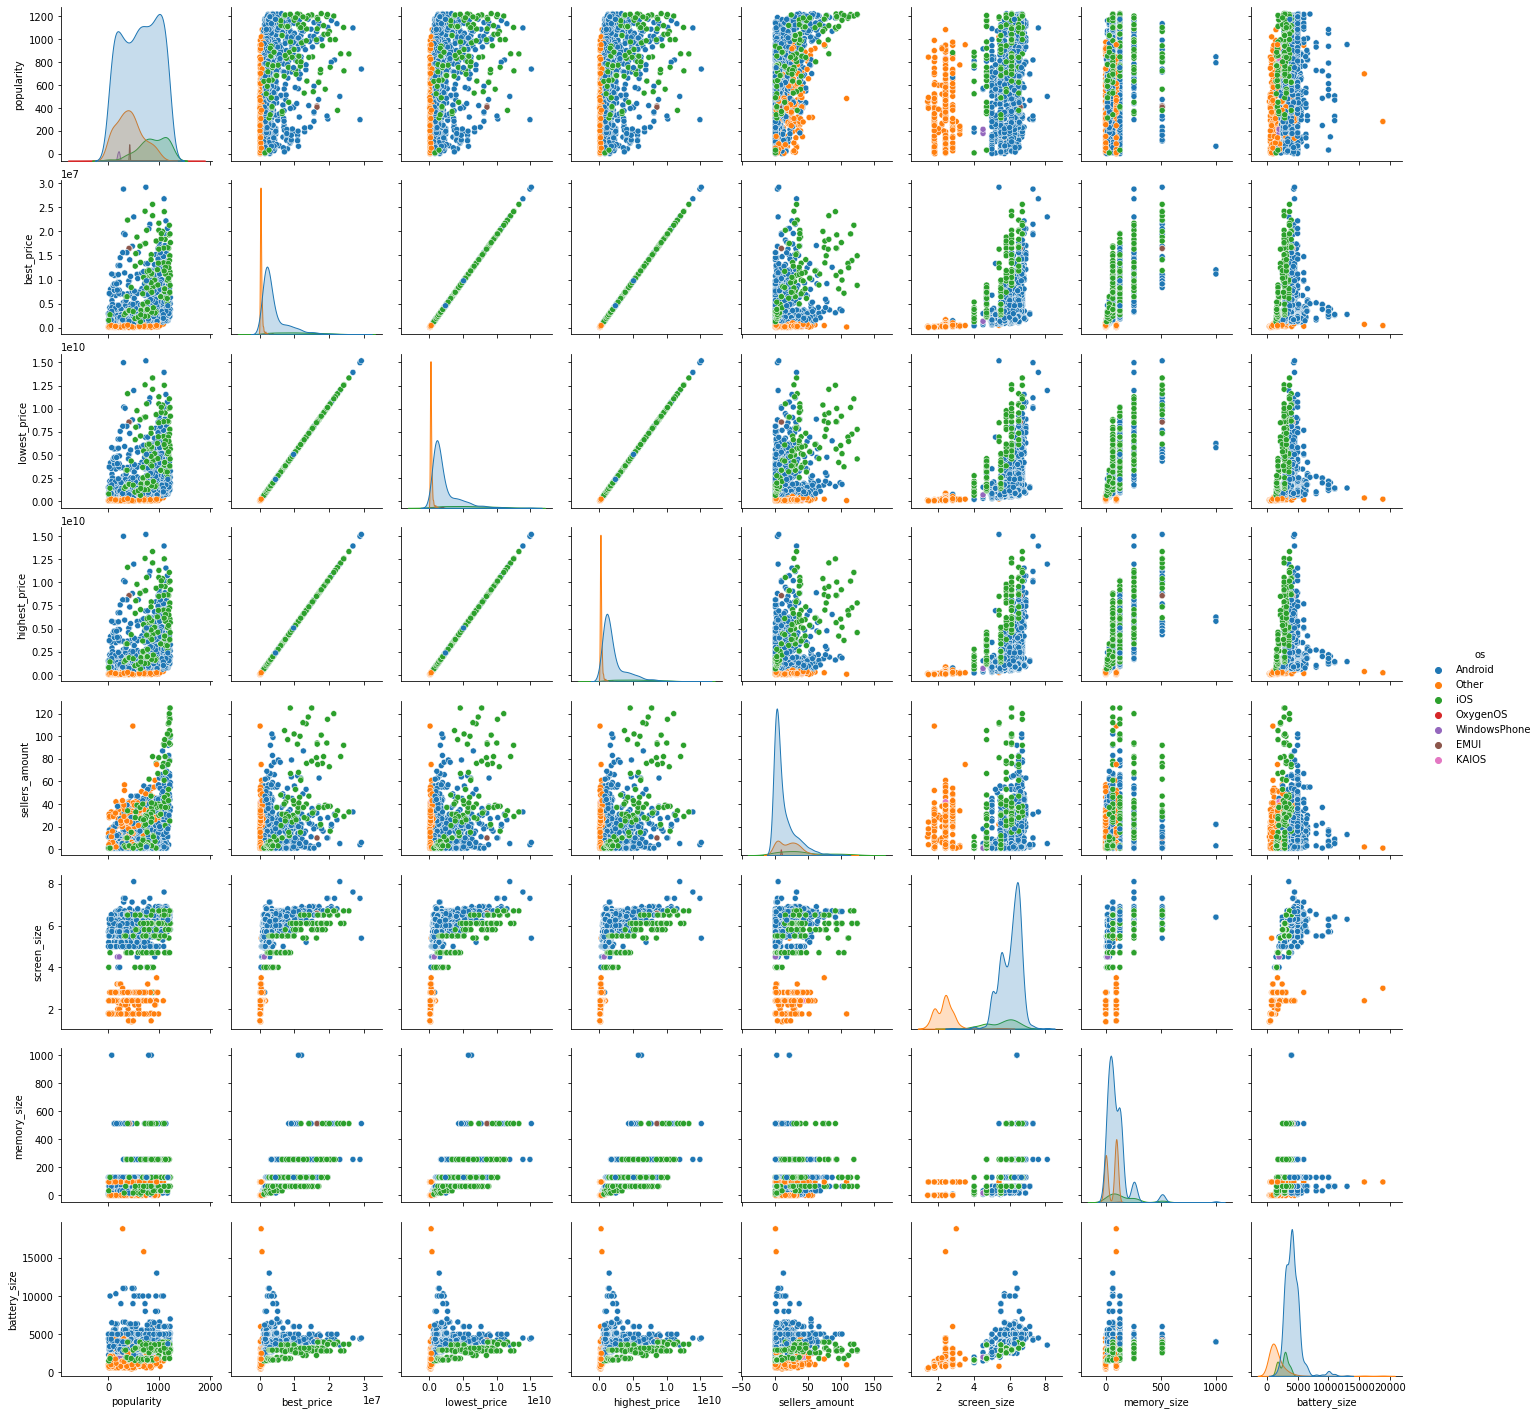

In [23]:
# plotting
# by os

by_column = 'os'
sns.pairplot(df[numericals + [by_column]], hue=by_column)
plt.show()

C:\Users\adama\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\adama\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\adama\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\adama\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\adama\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\adama\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

C:\Users\adama\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\adama\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\adama\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\adama\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\adama\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\adama\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

C:\Users\adama\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\adama\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\adama\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\adama\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\adama\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\adama\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

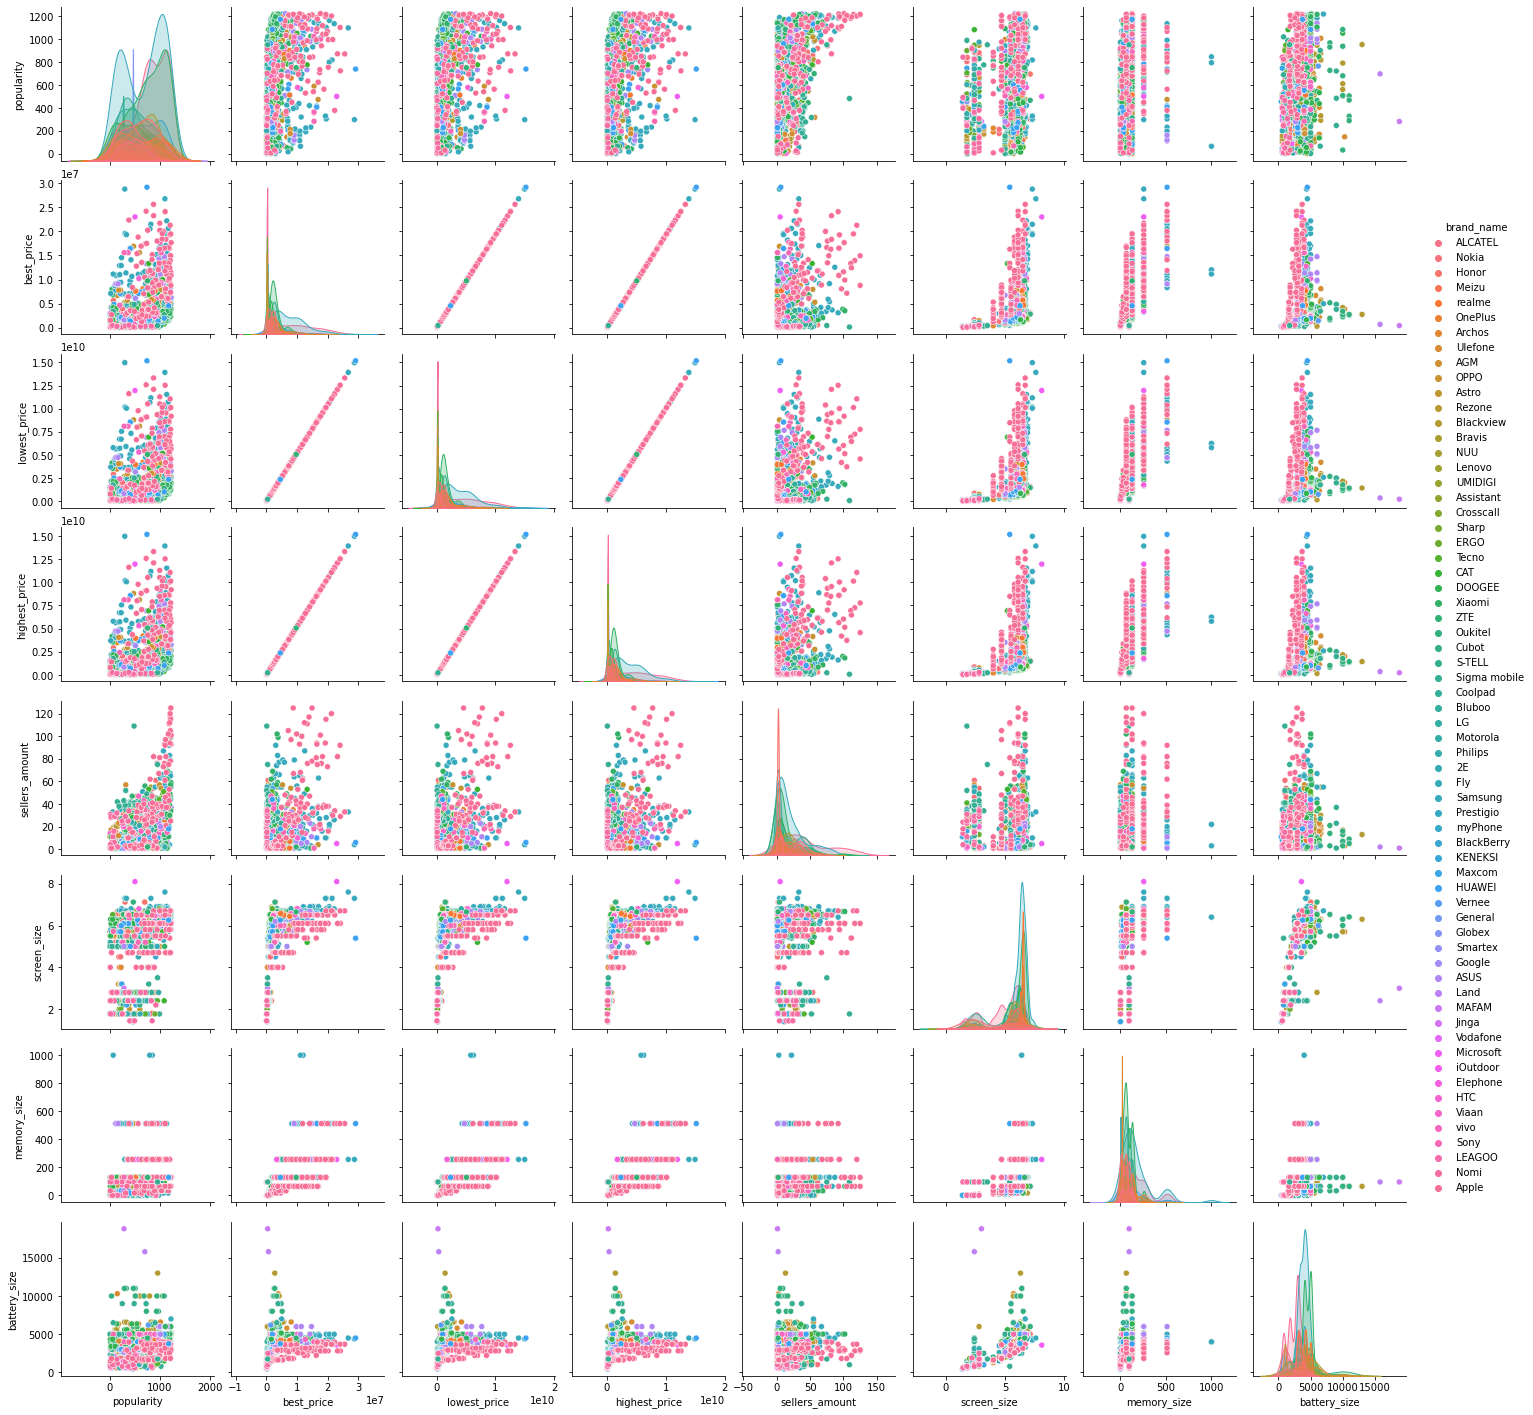

In [24]:
# plotting by brand

by_column = 'brand_name'

sns.pairplot(df[numericals + [by_column]], hue=by_column)
plt.show()

#### 2. Categorical

C:\Users\adama\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


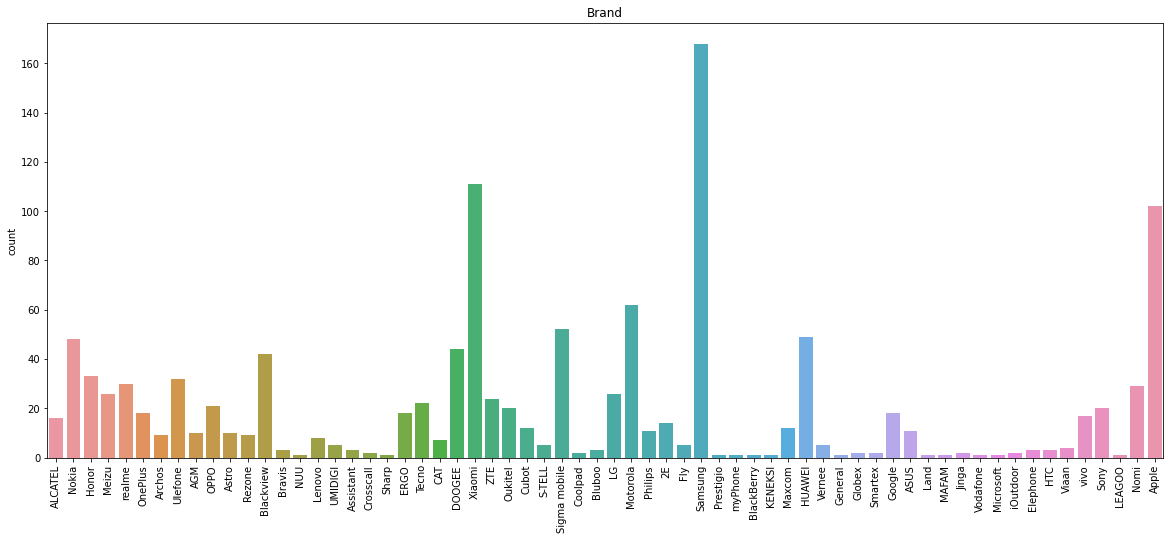

C:\Users\adama\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


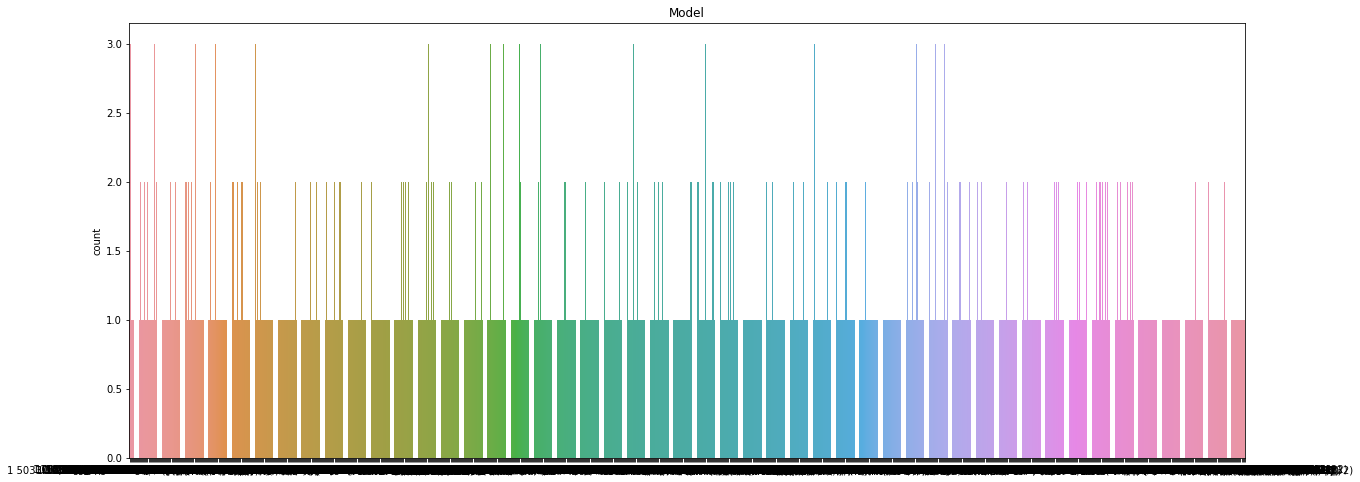

C:\Users\adama\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


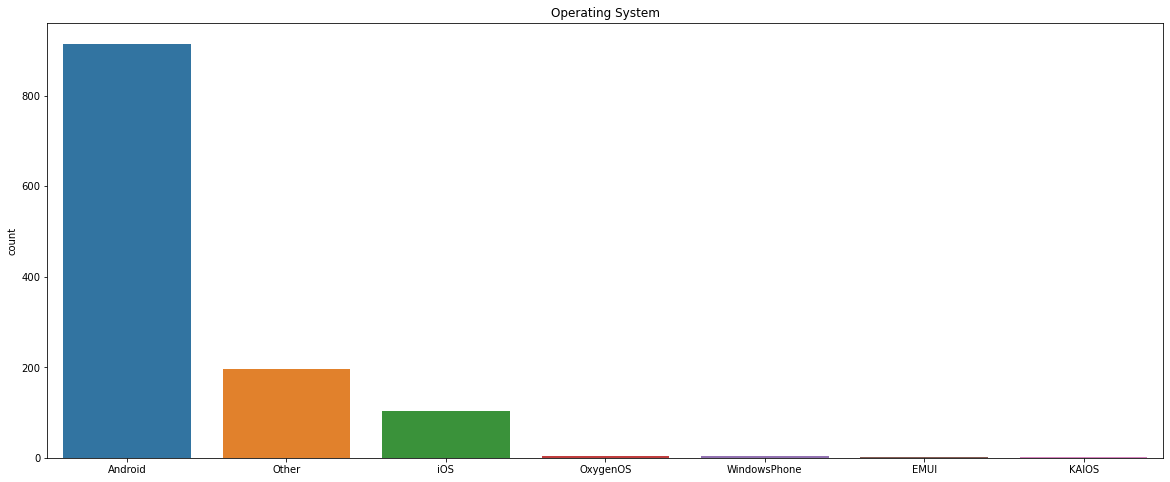

In [25]:
# Pembuatan visualisasi banyaknya total smartphone berdasarkan beberapa atribut

titles = ['Brand', 'Model', 'Operating System']

for categorical, title in zip(categoricals, titles):
    plt.figure(figsize=(width, height))
    plot_categorical(df, categorical)
    plt.title(title)
    
    if title == 'Brand':
        plt.xticks(rotation=90)
        
    plt.xlabel('')
    plt.show()

#### 3. Time-series

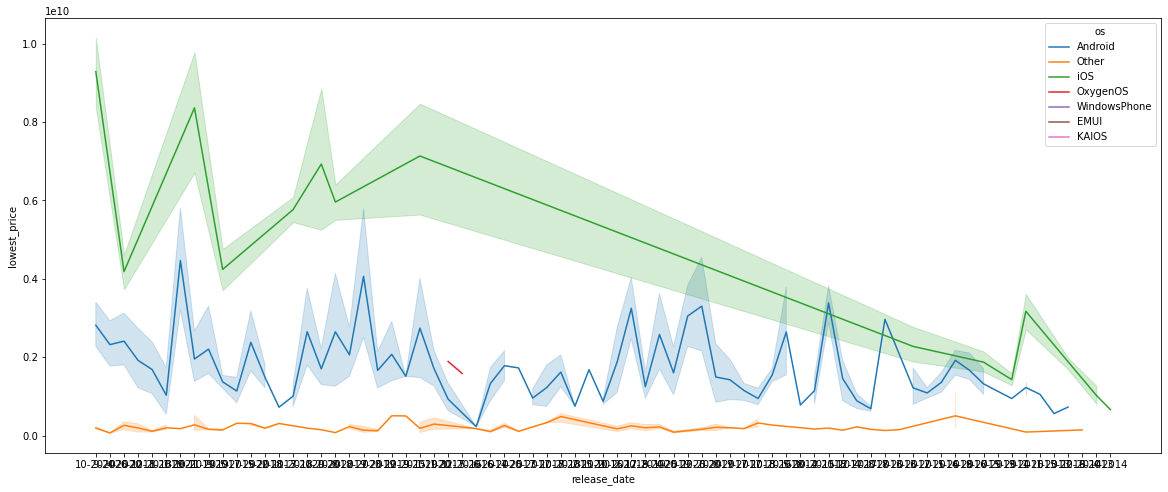

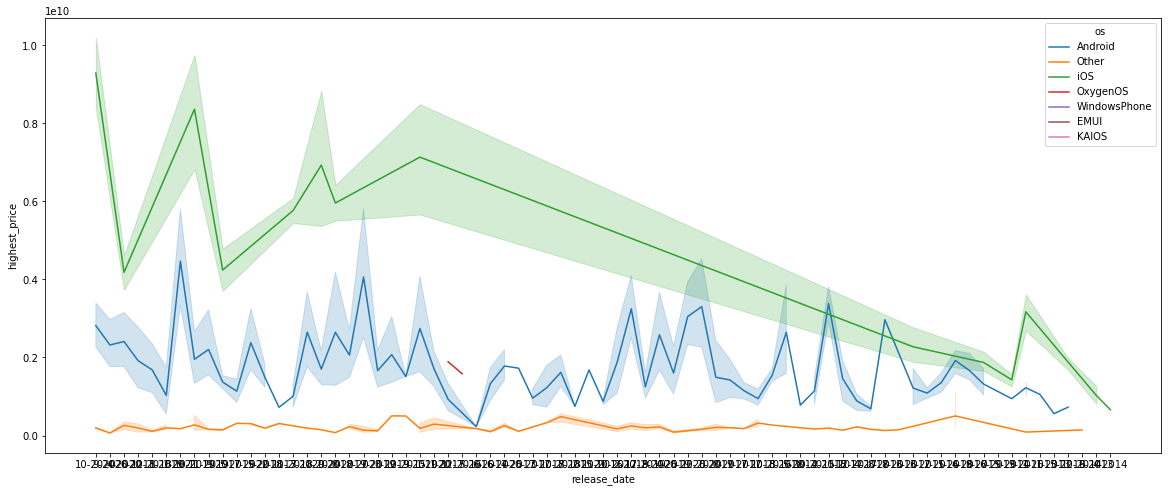

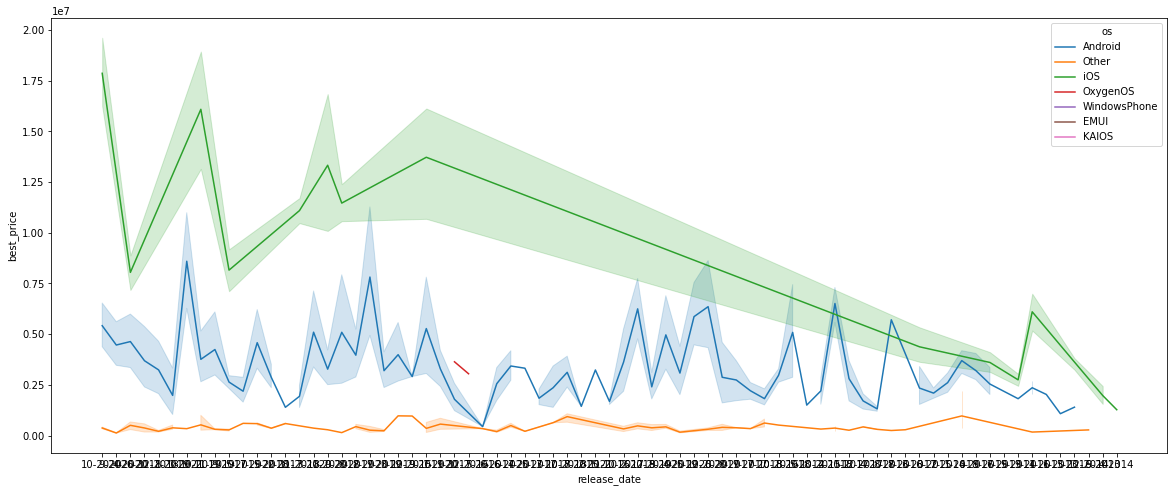

In [26]:
# perubahan harga dari waktu ke waktu
for price in [f"{e}_price" for e in ['lowest', 'highest', 'best']]:
    plt.figure(figsize=(width, height))
    sns.lineplot(data=df, x='release_date', y=price, hue='os')
    
plt.show()

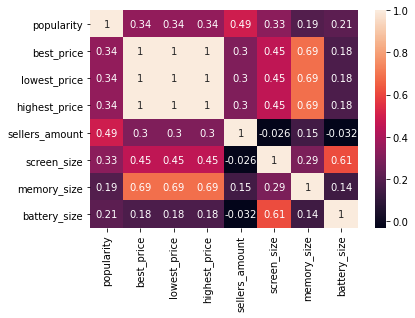

In [27]:
# mencari korelasi dari 6 atribut utama
df_small = df.iloc[:,:21]
correlation_mat = df_small.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

##### Dari gambar di atas, dapat dilihat bahwa memory_size adalah atribut yang paling besar korelasinya dengan price (best, lowest, highest).

## D. Data Clustering

In [28]:
import numpy as np

In [82]:
X = df.iloc[:, [4, 9]].values

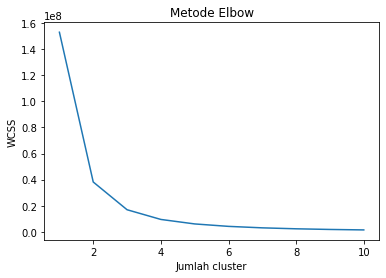

In [139]:
# memakai metode Elbow untuk mencari nilai klaster yang tepat
from sklearn.cluster import KMeans
    # WCSS is the sum of squared distance between each point and the centroid in a cluster.
    # When we plot the WCSS with the K value, the plot looks like an Elbow
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah cluster')
plt.ylabel('WCSS')
plt.show()

In [83]:
# Menjalankan K-Means Clustering ke dalam dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 1, 1, ..., 1, 0, 1])

In [32]:
df['cluster'] = kmeans.labels_

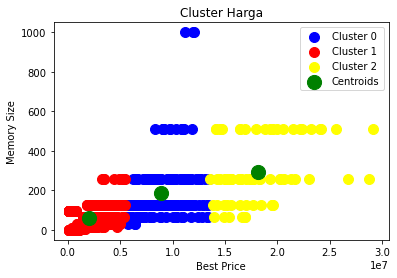

In [33]:
# Visualisasi hasil clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1],s = 100, c = 'blue', label = 'Cluster 0')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1],s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],s = 100, c = 'yellow', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'green', label = 'Centroids')
plt.title('Cluster Harga')
plt.xlabel('Best Price')
plt.ylabel('Memory Size')
plt.legend()
plt.show()

In [34]:
print(len(X))

1224


In [35]:
df.head()

,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date,cluster
0,ALCATEL,1 1/8GB Bluish Black (5033D-2JALUAA),Android,422,878800,456976000,456976000,36,5.00,8,2000,10-2020,1
1,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,323,937560,487531200,487531200,36,5.00,16,2000,9-2020,1
2,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,299,937560,487531200,487531200,36,5.00,16,2000,9-2020,1
3,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,287,937560,487531200,487531200,36,5.00,16,2000,9-2020,1
4,Nokia,1.3 1/16GB Charcoal,Android,1047,1039480,540529600,540529600,10,5.71,16,3000,4-2020,1


(array([210.,   0.,   0.,   0.,   0., 944.,   0.,   0.,   0.,  70.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

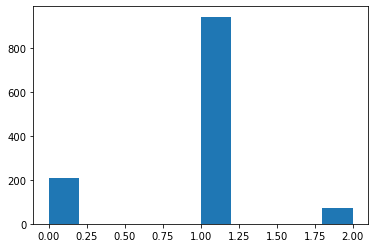

In [36]:
plt.hist(df['cluster'])

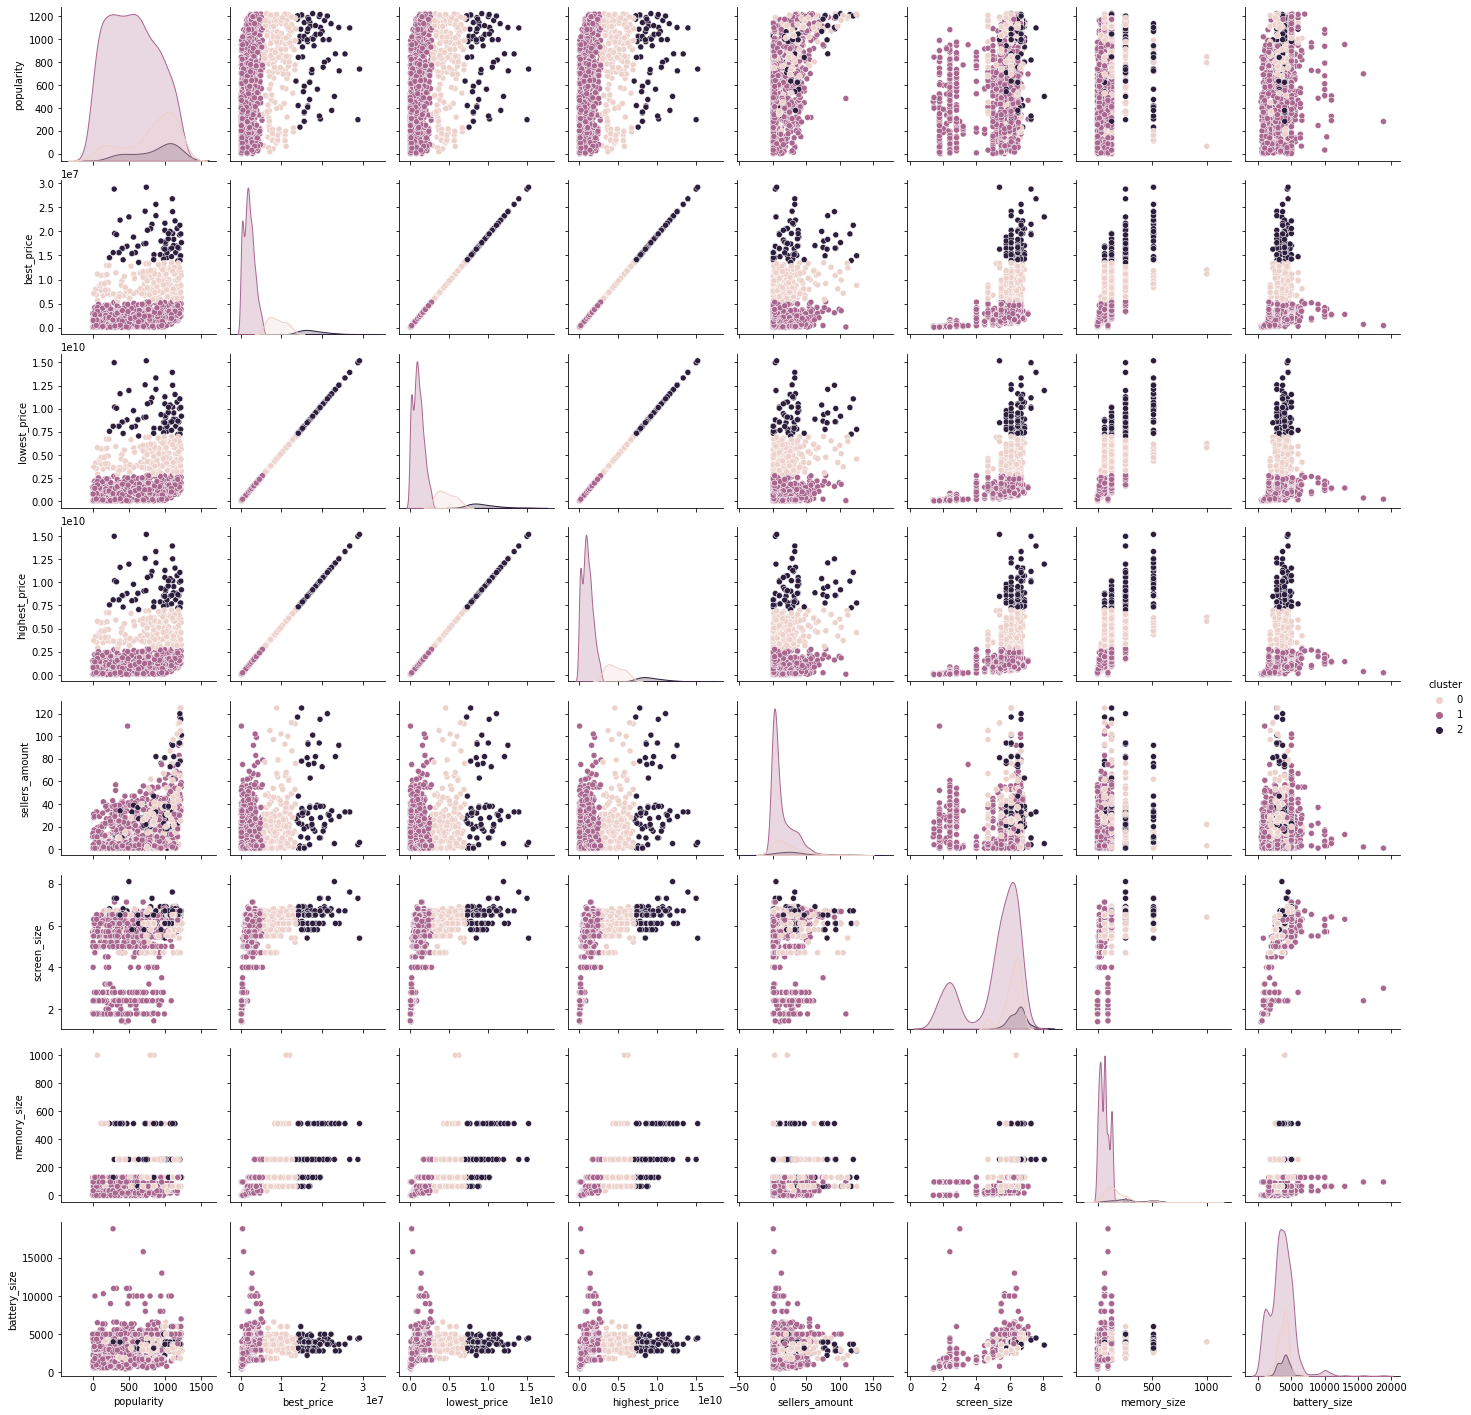

In [37]:
sns.pairplot(df,hue='cluster')

In [38]:
df.tail()

,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date,cluster
1219,Apple,iPhone XS Max 64GB Gold (MT522),iOS,1101,11796200,6134024000,6134024000,61,6.50,64,3174,9-2018,0
1220,Apple,iPhone XS Max Dual Sim 64GB Gold (MT732),iOS,530,12792000,6651840000,6651840000,28,6.50,64,3174,9-2018,0
1221,HUAWEI,nova 5T 6/128GB Black (51094MEU),Android,1174,4578080,2380601600,2380601600,18,6.26,128,3750,11-2019,1
1222,ZTE,nubia Red Magic 5G 8/128GB Black,Android,752,9752600,5071352000,5071352000,2,6.65,128,4500,10-2020,0
1223,Sigma mobile,x-style 35 Screen,Other,952,471640,245252800,245252800,75,3.50,95,1750,1-2020,1


In [39]:
df.iloc[353:358]

,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date,cluster
353,Fly,FF250 Black,Other,773,163280,84905600,84905600,25,2.4,95,800,1-2020,1
354,Fly,FF281 Dual Sim (Black),Other,653,284440,147908800,147908800,28,2.8,0,1400,7-2016,1
355,Fly,FF281 Silver,Other,502,283400,147368000,147368000,19,2.8,0,1400,11-2020,1
356,OPPO,Find X2 12/256GB Ocean Black,Android,590,15599480,8111729600,8111729600,2,6.7,256,4200,4-2020,2
357,OPPO,Find X2 Pro 12/512GB Orange,Android,474,16915600,8796112000,8796112000,4,6.7,512,4260,1-2021,2


In [40]:
df.drop(['screen_size', 'sellers_amount'], axis=1)

,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,memory_size,battery_size,release_date,cluster
0,ALCATEL,1 1/8GB Bluish Black (5033D-2JALUAA),Android,422,878800,456976000,456976000,8,2000,10-2020,1
1,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,323,937560,487531200,487531200,16,2000,9-2020,1
2,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,299,937560,487531200,487531200,16,2000,9-2020,1
3,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,287,937560,487531200,487531200,16,2000,9-2020,1
4,Nokia,1.3 1/16GB Charcoal,Android,1047,1039480,540529600,540529600,16,3000,4-2020,1
...,...,...,...,...,...,...,...,...,...,...,...
1219,Apple,iPhone XS Max 64GB Gold (MT522),iOS,1101,11796200,6134024000,6134024000,64,3174,9-2018,0
1220,Apple,iPhone XS Max Dual Sim 64GB Gold (MT732),iOS,530,12792000,6651840000,6651840000,64,3174,9-2018,0
1221,HUAWEI,nova 5T 6/128GB Black (51094MEU),Android,1174,4578080,2380601600,2380601600,128,3750,11-2019,1
1222,ZTE,nubia Red Magic 5G 8/128GB Black,Android,752,9752600,5071352000,5071352000,128,4500,10-2020,0


In [41]:
df1 = df.drop(['screen_size', 'sellers_amount', 'popularity', 'lowest_price', 'highest_price', 'battery_size', 'release_date'], axis=1)

In [42]:
df1.tail()

,brand_name,model_name,os,best_price,memory_size,cluster
1219,Apple,iPhone XS Max 64GB Gold (MT522),iOS,11796200,64,0
1220,Apple,iPhone XS Max Dual Sim 64GB Gold (MT732),iOS,12792000,64,0
1221,HUAWEI,nova 5T 6/128GB Black (51094MEU),Android,4578080,128,1
1222,ZTE,nubia Red Magic 5G 8/128GB Black,Android,9752600,128,0
1223,Sigma mobile,x-style 35 Screen,Other,471640,95,1


In [43]:
df1.iloc[353:358]

,brand_name,model_name,os,best_price,memory_size,cluster
353,Fly,FF250 Black,Other,163280,95,1
354,Fly,FF281 Dual Sim (Black),Other,284440,0,1
355,Fly,FF281 Silver,Other,283400,0,1
356,OPPO,Find X2 12/256GB Ocean Black,Android,15599480,256,2
357,OPPO,Find X2 Pro 12/512GB Orange,Android,16915600,512,2


In [44]:
df1.loc[df1['cluster']==0]

,brand_name,model_name,os,best_price,memory_size,cluster
5,Honor,10 6/64GB Black,Android,5649800,64,0
97,OnePlus,6T 8/256GB Midnight Black,Android,8125000,256,0
104,OnePlus,7 8/256GB Mirror Gray,Android,7510360,256,0
107,OnePlus,8 12/256GB Onyx Black,Android,8929440,256,0
110,OnePlus,8 8/128GB Onyx Black,Android,8236800,128,0
...,...,...,...,...,...,...
1216,Apple,iPhone XS 64GB Space Gray (MT9E2),iOS,10290800,64,0
1217,Apple,iPhone XS Max 256GB Gold (MT552),iOS,12575680,256,0
1219,Apple,iPhone XS Max 64GB Gold (MT522),iOS,11796200,64,0
1220,Apple,iPhone XS Max Dual Sim 64GB Gold (MT732),iOS,12792000,64,0


In [45]:
df1.loc[df1['cluster']==1]

,brand_name,model_name,os,best_price,memory_size,cluster
0,ALCATEL,1 1/8GB Bluish Black (5033D-2JALUAA),Android,878800,8,1
1,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,937560,16,1
2,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,937560,16,1
3,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,937560,16,1
4,Nokia,1.3 1/16GB Charcoal,Android,1039480,16,1
...,...,...,...,...,...,...
1202,Apple,iPhone SE 32GB Space Grey (MP822),iOS,4155320,32,1
1203,Apple,iPhone SE 64GB Space Gray (MLM62),iOS,3810560,64,1
1204,Apple,iPhone SE 64GB Space Gray (MLM62),iOS,3810560,64,1
1221,HUAWEI,nova 5T 6/128GB Black (51094MEU),Android,4578080,128,1


In [46]:
df1.loc[df1['cluster']==2]

,brand_name,model_name,os,best_price,memory_size,cluster
356,OPPO,Find X2 12/256GB Ocean Black,Android,15599480,256,2
357,OPPO,Find X2 Pro 12/512GB Orange,Android,16915600,512,2
432,Samsung,Galaxy Fold 12/256GB Black,Android,28775760,256,2
433,Samsung,Galaxy Fold 12/512GB Black (SM-F900FZKD),Android,21481200,512,2
434,Samsung,Galaxy Fold 5G SM-F907B 12/512GB Black,Android,19572800,512,2
...,...,...,...,...,...,...
1155,Apple,iPhone 12 Pro Max 256GB Pacific Blue (MGDF3),iOS,21273200,256,2
1156,Apple,iPhone 12 Pro Max 512GB Dual Sim Pacific Blue ...,iOS,25605840,512,2
1157,Apple,iPhone 12 Pro Max 512GB Pacific Blue (MGDL3),iOS,24089000,512,2
1159,Apple,iPhone 12 mini 256GB Black (MGE93),iOS,16311880,256,2


In [85]:
df.to_csv('phones_data_after_preprocessing.csv')

In [91]:
df1= pd.read_csv('phones_data_after_preprocessing.csv')
df2= df1.drop(['Unnamed: 0'], axis=1)
df2.head()

,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date,cluster
0,ALCATEL,1 1/8GB Bluish Black (5033D-2JALUAA),Android,422,878800,456976000,456976000,36,5.00,8,2000,10-2020,1
1,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,323,937560,487531200,487531200,36,5.00,16,2000,9-2020,1
2,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,299,937560,487531200,487531200,36,5.00,16,2000,9-2020,1
3,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,287,937560,487531200,487531200,36,5.00,16,2000,9-2020,1
4,Nokia,1.3 1/16GB Charcoal,Android,1047,1039480,540529600,540529600,10,5.71,16,3000,4-2020,1


In [131]:
df.to_csv('phones_data_after_preprocessing.csv')